# Kan Rou Yi 34661093

In [169]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # For handling missing values
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Task A: Data Wrangling and Analysis

##### 1. Read the ‘Student_List_A2.csv’ file and list the column names.

In [172]:
df = pd.read_csv('Student_List_A2.csv')
df.columns
df

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,1
2096,3388,18,10.680555,2,4,3.455509,0
2097,3390,16,6.805500,20,2,1.142333,2
2098,3391,16,12.416653,17,2,1.803297,1


##### 2.In this dataset, ‘GradeClass’ column contains the classification of students' 
grades based on GPA, where
##### Replace the numerical grade classifications (0, 1, 2, 3, 4) in the ‘GradeClass’ 
column with their corresponding letter grades ('A', 'B', 'C', 'D', 'F').:

In [174]:
column = { 
    0 : 'A',
    1 : 'B',
    2 : 'C', 
    3 : 'D',
    4 : 'F'
}

#use replace function 
df['GradeClass'] = df['GradeClass'].replace(column)
df


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,B
2096,3388,18,10.680555,2,4,3.455509,A
2097,3390,16,6.805500,20,2,1.142333,C
2098,3391,16,12.416653,17,2,1.803297,B


##### 3. Can you identify any missing values in the columns of this dataset? If so, replace 
the missing values with the median value of the relevant column where you fin 
missing values.

In [176]:
# Step 1: Check for missing values in each column
print("Missing values in each column before handling:")
print(df.isnull().sum())

# Step 2: Replace missing values with the median using pandas apply and fillna
df = df.apply(lambda col: col.fillna(col.median()) if col.isnull().sum() > 0 else col)

# Step 3: Verify that missing values are handled
print("\nMissing values in each column after handling:")
print(df.isnull().sum())

df

Missing values in each column before handling:
StudentID           0
Age                 0
StudyTimeWeekly    21
Absences            0
ParentalSupport     0
GPA                 0
GradeClass          0
dtype: int64

Missing values in each column after handling:
StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
GPA                0
GradeClass         0
dtype: int64


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,B
2096,3388,18,10.680555,2,4,3.455509,A
2097,3390,16,6.805500,20,2,1.142333,C
2098,3391,16,12.416653,17,2,1.803297,B


##### 4. Identify a data quality problem related to the ‘Absences’ column and delete the rows that exhibit this problem. Refer to Week 4 for information on data quality problems.

In [178]:
# Check the 'Absences' column for negative values (example of a data quality problem)
absences_issue = df[df['Absences'] < 0]
print(f"Rows with invalid 'Absences':")
absences_issue

Rows with invalid 'Absences':


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
1001,2003,15,0.806505,-122,3,3.20171,B


In [179]:
# Remove rows where Absences have invalid negative values
df=df[df['Absences'] >= 0]

In [180]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Absences'].quantile(0.25)
Q3 = df['Absences'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display unique values in the cleaned 'Absences' column
df['Absences'].unique()


array([  0,  26,  14,  17,  10,  22,   1,  11,  15,  21,   9,  16,  29,
         2,  25,  20,   5,   8,  12,  27,  23,   3,   7,  13,   6,  28,
         4,  18,  19,  24, 320], dtype=int64)

##### 5. Examine the 'GPA' and 'GradeClass' columns together for additional data quality 
issues. Propose an appropriate solution for these issues and resolve them.

In [182]:
# Function to determine the correct GradeClass based on GPA
def check_grade_class(gpa):
    if gpa >= 3.5:
        return 'A'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.5 <= gpa < 3.0:
        return 'C'
    elif 2.0 <= gpa < 2.5:
        return 'D'
    else:
        return 'F'

# Proceed with the rest of the code
df = df.copy()  # Ensure we are working with a copy of the DataFrame to avoid modifying a slice

# Convert 'GPA' to numeric, filling invalid entries with 0
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce').fillna(0)
df.loc[:, 'Correct_GradeClass'] = df['GPA'].apply(check_grade_class)
df.loc[:, 'Mismatch'] = df['GradeClass'] != df['Correct_GradeClass']
inconsistent_rows = df[df['Mismatch'] == True]

# Replace 'GradeClass' with 'Correct_GradeClass' where there is a mismatch
df.loc[df['Mismatch'], 'GradeClass'] = df['Correct_GradeClass']

# Drop the 'Correct_GradeClass' and 'Mismatch' columns
df = df.drop(columns=['Correct_GradeClass', 'Mismatch'])

# Display the DataFrame to verify the changes
print(df[['GPA', 'GradeClass']])  # Optional, just to verify the result

# Output the updated DataFrame
df

           GPA GradeClass
0     3.042915          B
1     0.112602          F
2     2.054218          D
3     1.288061          F
4     3.084184          B
...        ...        ...
2095  1.395631          F
2096  3.455509          B
2097  1.142333          F
2098  1.803297          F
2099  2.140014          D

[2099 rows x 2 columns]


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B
...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,F
2096,3388,18,10.680555,2,4,3.455509,B
2097,3390,16,6.805500,20,2,1.142333,F
2098,3391,16,12.416653,17,2,1.803297,F


### A2. Supervised Learning (1.5 marks)

##### 1. Explain supervised machine learning, the notion of labelled data, and train and test datasets.

Answer:
Machine learning is the scientidic study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, replying on patternds and inference instead. 

Supervised Machine Learning - Supervised Machine Learning is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled data sets to train algorithms that to classify data or predict outcomes accurately.All data is labelled and the algorithms learn to predict the output from the input data. The goal is to approximate the mapping function so well that when you have new input data, you can predict the output variable for the data.

Notion of labelled data - In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it. 

Training data teaches a machine learning model how to behave while testing data evaluates how well the model has learned
Training data is used to teach the machine learning model how to make predictions or perform a desired task.

Testing data is used to evaluate the machine learning model’s performance.

##### 2.Read the ‘Student_List_A2.csv’ file and separate the features and the label.

Note that:
o the label, in this case, is the ‘GradeClass
’
o studentID is not logically a useful predictor of a student's grade so shou d
not be used as a featu
re
o GPA is translated to GradeClass. They both represent the same thio  so
GPA should not be used as a feat
ure.
o Use the rest of the features as predictors

In [187]:

# Step 2: Drop the irrelevant columns ('studentID', 'GPA') since they are not useful features
df = df.drop(['StudentID', 'GPA'], axis=1)

# Step 3: Separate features (X) and the label (y)
# The label is 'GradeClass', and features are all other columns
X = df.drop('GradeClass', axis=1)  # Features
y = df['GradeClass']  # Label

# Verify the separation
print("Features (X) shape:", X.shape)
print("Features (X):\n" , X.head())
print("")
print("Label (y) shape:", y.shape)
print("Features (Y):\n" ,y.head())

Features (X) shape: (2099, 4)
Features (X):
    Age  StudyTimeWeekly  Absences  ParentalSupport
0   18        15.408756         0                1
1   15         4.210570        26                2
2   17        10.028829        14                3
3   17         4.672495        17                3
4   18         8.191219         0                1

Label (y) shape: (2099,)
Features (Y):
 0    B
1    F
2    D
3    F
4    B
Name: GradeClass, dtype: object


##### 3. Use the sklearn.model_selection.train_test_split function to split your data for 
training and testing (Keep 80% of the data for training)

In [189]:
from sklearn.model_selection import train_test_split

# Step 7: Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)

Training set shape (X_train): (1679, 4)
Test set shape (X_test): (420, 4)


In [190]:
#import packages 
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


# Print feature and label names
print(f"Features: {X.columns}")
print(f"Label: 'GradeClass'")

# Print head and shape of training and testing sets
print('')
print('X_train : ')
print(X_train.head())
print(f"X_train shape: {X_train.shape}")

print('')
print('X_test : ')
print(X_test.head())
print(f"X_test shape: {X_test.shape}")

print('')
print('y_train : ')
print(y_train.head())
print(f"y_train shape: {y_train.shape}")

print('')
print('y_test : ')
print(y_test.head())
print(f"y_test shape: {y_test.shape}")


Features: Index(['Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport'], dtype='object')
Label: 'GradeClass'

X_train : 
      Age  StudyTimeWeekly  Absences  ParentalSupport
1592   18         3.403053        14                2
1380   18        11.874116        27                4
414    15        16.799964        27                2
704    15         9.144608        11                1
755    16        11.934460        17                3
X_train shape: (1679, 4)

X_test : 
      Age  StudyTimeWeekly  Absences  ParentalSupport
1006   15        19.916047         1                2
1079   17         5.036294        12                3
67     18         5.690239        21                3
867    17         9.019730        22                2
650    18         6.718923        15                1
X_test shape: (420, 4)

y_train : 
1592    F
1380    F
414     F
704     D
755     D
Name: GradeClass, dtype: object
y_train shape: (1679,)

y_test : 
1006    B
1079    D
67      F
867     F
65

### A3. Classification (training) (3 marks)

##### 1. In preparation for classification, your data should be normalised/scaledely

##### a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).

##### Answer: Machine learning typically requires data normalization as a preprocessing step. It is used by ML engineers to scale and standardize their data, which is crucial to to guarantee that each feature affects the prediction equally. Without normalization, features with larger scales (like age versus income) might dominate these distance calculations, leading to biased predictions.

##### b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately

In [196]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform the data
X_train_scaled = sc.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = sc.transform(X_test)

##### 2. Use the Support Vector Machine algorithm to build the model

##### a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning

##### Answer: SVM also known as Support Machines are a set of supervised learning methods used for classification, regression and outliers detection.SVMs work by finding the optimal hyperplane that separates data points into different classes.The data points that are closest to the hyperplane are known as support vectors, and this is how support vector machine learning operates.SVMs aim to maximize the margin between the decision boundary and class data points, minimizing classification errors. A larger margin indicates greater confidence in classification. They find the hyperplane that maximizes this margin, making them maximum-margin classifiers. The strength of SVMs is it is a good generalization in both theory and practice, it works well with few training instances,it amenable to the kernel trick, it was find globally best model and efficient algorithms.The disadvantage of SVMs is it is "slow" to train or predict for huge data sets and need to choose the kernel.

##### b. In SVM, there is something called the kernel. Explain what you understand from it.

##### Answer: 
##### SVMs support many tyopes of kernels.Kernel is a set of mathematical functions that used by SVM.SVM uses kernel-trick for transforming data points and creating an optimal decision boundary.Kernels helps us to deal with high dimensional data in a very efficient manner.Different SVM use different types of kernel functions. For example, sigmoid kernel,polynomial kernel,linear kernel,Gaussian Kernel and Gaussian Kernel Radial Basis Function (RBF).

##### Sigmoid Kernel - mostly preferred for neural networks.

##### Polynomial Kernel is useful in visual pattern recognition.Example: 16 X 16 pixel image.

##### Linear Kernel - the most basic type of kernel,is the best function when there are lots of features, mostly preferred for text-classification problems.

##### Gaussian Kernel - used when there is no prior knowledge of a given dataset.

##### Gaussian Kernel Radial Basis Function (RBF) - One of the most preffered and used kernel functions in SVM, usually chosen for non-linear data, helps to make proper separation when there is no prior knowledge of data.

##### In conclusion, the kernel trick makes SVMs learn non-linear decision surfaces.

##### c. Write the code to build a predictive SVM model using your training dataset. (Note: You are allowed to engineer or remove features as you deem appropriate)

In [203]:
#Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=0)  # Changed random_state to match previous code
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# SEvaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)

# Print evaluation metrics
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 78.57%


##### 3. Repeat Task A3.3.c by using another classification algorithm such as Decision 
Tree or Random Forest algorithms instead of SVM.

##### Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy",random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [207]:
# Predict on the test data
y_pred = classifier.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[  2,   5,   3,   0,   0],
       [  7,  10,  15,   3,   0],
       [  1,  11,  32,  22,   2],
       [  0,   2,  16,  33,  19],
       [  0,   0,   3,  15, 219]], dtype=int64)

In [209]:
# Evaluate the performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 70.48%


### A4. Classification (prediction) (3 marks)

##### 1. Using the testing dataset you created in Task A2.3 above, conduct the prediction for the ‘GradeClass’ (label) using the two models built by SVM and your other classification algorithm in Task A3.3.

In [212]:
svm_model = SVC()  # You can adjust hyperparameters as needed
svm_model.fit(X_train, y_train)

# Step 2: Train the second classification model (Decision Tree as an example)
dt_model = DecisionTreeClassifier(random_state=0)  # Replace with your chosen algorithm
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set using both models
svm_predictions = svm_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

print("SVM_predictions:")
svm_predictions

SVM_predictions:


array(['B', 'D', 'F', 'F', 'F', 'F', 'F', 'B', 'F', 'F', 'C', 'F', 'F',
       'D', 'F', 'B', 'D', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'F',
       'D', 'F', 'C', 'F', 'F', 'F', 'C', 'F', 'F', 'F', 'D', 'F', 'D',
       'F', 'B', 'F', 'F', 'F', 'B', 'F', 'C', 'C', 'F', 'C', 'B', 'F',
       'F', 'D', 'F', 'D', 'C', 'F', 'F', 'C', 'F', 'F', 'B', 'F', 'C',
       'C', 'F', 'F', 'F', 'B', 'D', 'F', 'F', 'F', 'F', 'D', 'C', 'F',
       'D', 'F', 'B', 'C', 'F', 'F', 'C', 'F', 'D', 'B', 'F', 'F', 'F',
       'F', 'F', 'B', 'F', 'F', 'F', 'F', 'D', 'F', 'C', 'B', 'F', 'B',
       'C', 'F', 'F', 'C', 'B', 'D', 'F', 'F', 'F', 'F', 'B', 'F', 'F',
       'F', 'F', 'F', 'D', 'F', 'F', 'F', 'F', 'D', 'F', 'C', 'D', 'C',
       'F', 'F', 'F', 'C', 'C', 'D', 'F', 'F', 'F', 'F', 'B', 'F', 'F',
       'C', 'F', 'C', 'B', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'D', 'F',
       'F', 'F', 'F', 'F', 'D', 'F', 'C', 'F', 'C', 'F', 'B', 'F', 'D',
       'C', 'F', 'D', 'C', 'F', 'F', 'C', 'D', 'F', 'B', 'D', 'F

In [213]:
print("DT_predictions:")
dt_predictions

DT_predictions:


array(['B', 'D', 'F', 'F', 'F', 'F', 'F', 'B', 'F', 'F', 'C', 'F', 'F',
       'F', 'F', 'B', 'D', 'F', 'F', 'F', 'D', 'D', 'F', 'F', 'F', 'F',
       'D', 'F', 'C', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'D', 'F', 'D',
       'F', 'C', 'D', 'F', 'F', 'C', 'F', 'C', 'C', 'F', 'B', 'A', 'F',
       'F', 'F', 'F', 'F', 'C', 'F', 'D', 'C', 'F', 'F', 'C', 'F', 'D',
       'C', 'F', 'F', 'F', 'C', 'D', 'F', 'F', 'F', 'F', 'C', 'C', 'F',
       'C', 'F', 'A', 'C', 'F', 'F', 'C', 'F', 'F', 'B', 'F', 'F', 'F',
       'F', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'C', 'F', 'B',
       'C', 'F', 'F', 'C', 'B', 'D', 'F', 'F', 'F', 'F', 'B', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'B', 'F', 'C',
       'F', 'F', 'F', 'C', 'C', 'D', 'F', 'F', 'F', 'F', 'B', 'F', 'D',
       'F', 'F', 'C', 'C', 'F', 'F', 'F', 'A', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'C', 'F', 'C', 'F', 'C', 'F', 'B', 'F', 'D',
       'C', 'F', 'D', 'B', 'F', 'F', 'C', 'D', 'F', 'B', 'F', 'F

##### 2. Display the confusion matrices for both models (it should look like a 5x5 matrix). 
Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-clas 
classification problem setting.

In [215]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
cm_svm 

Confusion Matrix for SVM:


array([[  0,  10,   0,   0,   0],
       [  0,  20,  15,   0,   0],
       [  0,   9,  44,  15,   0],
       [  0,   0,  14,  36,  20],
       [  0,   0,   0,   7, 230]], dtype=int64)

In [216]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 3: Generate and display the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print the confusion matrix
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

Confusion Matrix for Decision Tree:
[[  1   6   3   0   0]
 [  5  12  16   2   0]
 [  2  12  34  18   2]
 [  0   3  14  29  24]
 [  0   0   1  12 224]]


##### 3. Compare the performance of SVM and your other classifier and provide your justification on which one performed better.

##### Answer:
Accuracy of SVM - 78.57%
SVM works well in higher dimensions, the model maximize the margin between data points, ensure fewer errors during classification.

Accuracy of Decision Tree - 70.48%
Decision Trees are more interpretable and easy to interpret and works well with non-linear data but they tend to overfit. 

In conclusion, SVM have higher accuracy than decision tree. This proves that the data is more suited for a linear decision boundary.

### A5. Independent evaluation (Competition ) (2.5 marks)

##### 1. Read the Student_List_A2_Submission.csv file and use the best model you built earlier to predict the ‘GradeClass for the students in this file.

##### 2. Unlike the previous section in which you have a testing dataset where you know the ‘GradeClass’ and will be able to test for the accuracy, in this part, you don’t have a ‘GradeClass’ and you have to predict it and submit the predictions along with other required submission files.
○ Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘StudentID and ‘GradeClass’. It should have total of 162 lines (1 header, and 161 entries).

○ Hint: you may need to apply some of the data wrangling steps in A1 to this new data file (i.e., Student_List_A2_Submission.csv), to prepare it for prediction.

In [222]:
df2= pd.read_csv('Student_List_A2_Submission.csv')
df2.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
0,5000,16,13.274090,27,1
1,5001,17,16.926360,6,2
2,5002,15,4.225258,15,3
3,5003,16,18.839829,17,3
4,5004,15,9.075075,6,2


In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        161 non-null    int64  
 1   Age              161 non-null    int64  
 2   StudyTimeWeekly  161 non-null    float64
 3   Absences         161 non-null    int64  
 4   ParentalSupport  161 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.4 KB


In [224]:
X = df2.drop(['StudentID'], axis=1)

In [225]:
X = sc.transform(X)

In [226]:
# Try a linear kernel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = svm_model.predict(X)
df2['GradeClass'] = predictions


In [227]:
# Make predictions on the test set
predictions = svm_model.predict(X)
df2['GradeClass'] = predictions 

In [228]:
new=df2[['StudentID','GradeClass']]
new

,StudentID,GradeClass
0,5000,F
1,5001,C
2,5002,F
3,5003,D
4,5004,C
...,...,...
156,5156,D
157,5157,F
158,5158,F
159,5159,C


In [229]:
# Save the output to a CSV file
new.to_csv('Student_List_A2_Predictions.csv', index=False)

#### Task B: Selection of Dataset, Clustering

##### B1. Selection of a Dataset with missing data and Clustering (4 marks) 
We have demonstrated a k-means clustering algorithm in week 7. Your task in this part
is to find an interesting dataset and apply k-means clustering on it using Python. For
instance, Kaggle is a private company which runs data science competitions and
provides a list of their publicly available datasets: https://www.kaggle.com/datasets
1. Select a suitable dataset that contains some missing data and at least two
numerical features. Please note you cannot use the same data set used in the
applied sessions/lectures in this unit. Please include a link to your dataset in
your report. You may wish to:
● provide the direct link to the public dataset from the internet, or
● place the data file in your Monash student - google drive and provide its
link in the submission.
2. Perform wrangling on the dataset to handle/treat the missing data and explain
your procedure
3. Perform k-means clustering, choosing two numerical features in your dataset
and create k clusters using Python (k>=2)
4. Visualise the data as well as the results of the k-means clustering, and describe
your findings about the identified clusters.

#### Sources: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [233]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [234]:
df.shape

(6607, 20)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [236]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


##### Teacher_Quality has 78 missing
##### Parental_Education_Level has 90 missing
##### Distance_from_Home has 67 missing

In [238]:
# Drop rows with any missing data
df_cleaned = df.dropna()

# Check that missing values are removed
print(df_cleaned.isnull().sum())  # Should show 0 for all columns


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


##### For clustering, two numerical features will be used: Hours_Studied and Exam_Score

Text(0, 0.5, 'Exam_Score')

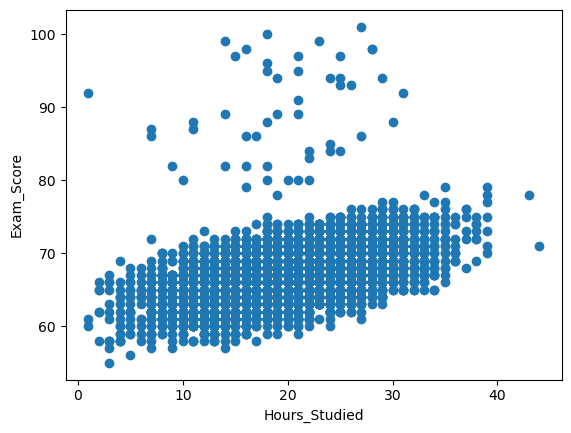

In [240]:
%matplotlib inline 
plt.scatter(x=df['Hours_Studied'],y=df['Exam_Score'])
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')

In [241]:
kmeans.cluster_centers_

array([[20.58118843, 67.18938672],
       [13.04920554, 64.66068683],
       [27.66666667, 70.66136514]])

Student who studied of average 20.58 hours per week get 67.19% in their exam score.

Student who studied of average 13.05 hours per week get 64.66% in their exam score.

Student who studied of average 27.67 hours per week get 70.66% in their exam score.

In [242]:
kmeans.labels_

array([0, 0, 2, ..., 0, 1, 1])

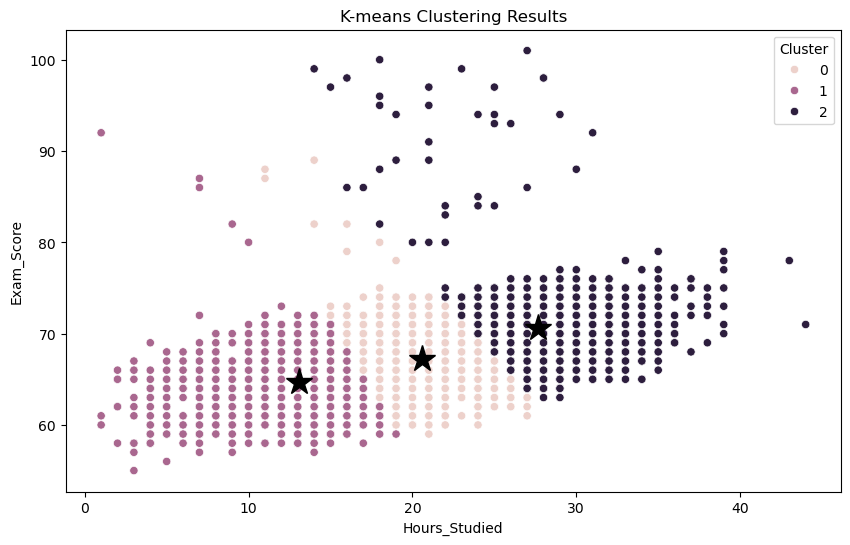

In [243]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
X = df[['Hours_Studied', 'Exam_Score']]

# Perform K-means clustering with k=3 (you can adjust k)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize = 20
)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Cluster', data=df)
plt.title('K-means Clustering Results')
plt.show()

The clusters clearly suggest that students who study more tend to perform better in exams, while those who study less tend to score lower.

Cluster 1 represent students studied for fewer hours (less than ~15 hours) and scored relatively lower on the exam.

Cluster 0  represent students with moderate study hours and moderate scores.

Cluster 2  represents students who studied for longer hours (more than ~20 hours) and achieved higher exam scores.
